# Linear Regression
> This post explains linear regression along with excat and gradient descent methods
- toc: true
- badges: true
- comments: true
- categories: [python,machine learning,linear regression]
- image: images/linear_regression_logo.png

## **Problem Definition**
In Linear Regression we are interested in predicting a scalar-valued target, such as price of a stock/house etc. By linear, we mean that target is represented as a linear function of inputs. This is a **supervised learining** algorithm 

### **A Learning Problem**
* **Model** or **Architecture** : defines the set of allowable hypothesis, or functions that compute predictions from the inputs
* **Loss Function** : a measure for checking the goodness of hypothesis


In linear regression the model is a family of linear functions. A linear function is given by 

$$ 
y = \sum_{j} w_{j}x_{j} + b
$$
where $w_{j}$ are the weights and $b$ is the bias and $j \in \{1,2 \cdots D \}$ where $D$ is the dimensionality of the input

In [41]:
#collapse-hide
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

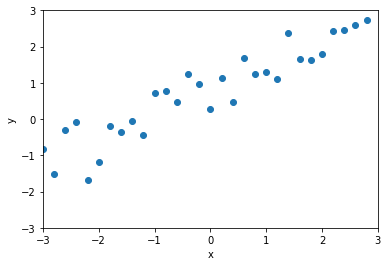

In [34]:
#collapse-hide
# To simulate data and 3 hypothesis 
x = np.arange(-3,3,0.2)
y = 0.6*x + 0.8 
rng = np.random.default_rng(42) 
t = y +  rng.normal(loc= 0, scale= 0.6,size=x.shape)
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

* The linear model can be visualised using two ways 
    1. dataspace  : targets plotted as a function of inputs. In the below example, 3 different possible linear fits are shown
    2. weight space : pairs $(w,b)$ are plotted . we can visualise this as a scatter plot

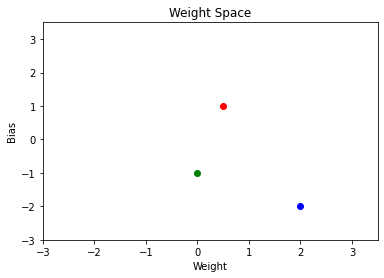

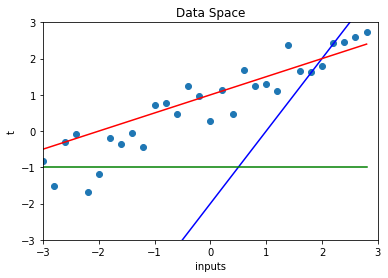

In [38]:
#collapse-hide
colors = ['blue', 'red', 'green']
# defining 3 different models with 3 weights and 3 biases 
w0 = np.array([2.0, 0.5, 0])
b0 = np.array([-2, 1.0, -1]) 
plt.figure()
ws = plt.axes()
ws.set_xlim(-3,3.5)
ws.set_ylim(-3,3.5)
ws.set_title('Weight Space')
ws.set_xlabel('Weight')
ws.set_ylabel('Bias')

plt.figure()
dm = plt.axes()
dm.scatter(x,t)
dm.set_xlim(-3,3)
dm.set_ylim(-3,3)
dm.set_title('Data Space')
dm.set_xlabel('inputs')
dm.set_ylabel('t')

for w,b,color in zip(w0,b0,colors):
    # y actuals
    y = w*x + b 
    dm.plot(x,y,c=color)
    ws.scatter(w,b,c=color)


## **Goodness of Fit : Loss Function**

In the above figure some of the lines are better fit than others. To evaluate the **goodness of fit**, we have to define a **loss function** $\mathcal{L}(y,t)$
which says the error between predictions $y$ and target $t$, known as **residual**. In linear regression, we use the **squared error**, defined as 
$$\mathcal{L}(y,t) = \frac{1}{2}\left( y - t \right)^{2} $$
Combining the model and loss, give us an **optimization** problem, where we will optimize a cost function with respect to the model paramaeters. 
**Cost Function** is the loss function averaged over all the training examples. 
$$\mathcal{E} \left(w_{1}, w_{2}, \cdots , w_{D},b \right) =  \frac{1}{N} \sum_{i=1}^{N} \mathcal{L}(y^{(i)},t^{(i)})$$
$$ = \frac{1}{2N}\sum_{i=1}^{N} \left(y^{(i)} - t^{(i)} \right)^{2}$$
$$= \frac{1}{2N} \sum_{i=1}^{N} \left(\sum_{j = 1}^{D} w_{j}x_{j}^{(i)} + b - t^{(i)} \right)^{2}$$

#### **Vectorizing the Equation**
$$\mathbf{X} = \begin{pmatrix} x^{(1)T} \\ x^{(2)T} \\ x^{(3)T} \end{pmatrix} \;\; W = \begin{pmatrix} w_{1} \\ w_{2} \\ w_{3}\end{pmatrix}$$
where $x^{(1)}$ is a column matrix indicating one sample
$$ \mathbf{Xw} + \mathbf{b} = \begin{pmatrix} w^{T}x^{(1)} \\ \vdots \\ w^{T}x^{(N)} \end{pmatrix} + \begin{pmatrix} b_{1} \\ \vdots \\ b_{n} \end{pmatrix} $$
that is each element is a dot product between a row vector $x^{(i)}$ in  $\mathbf{X}$ and colum vector $\mathbf{w}$

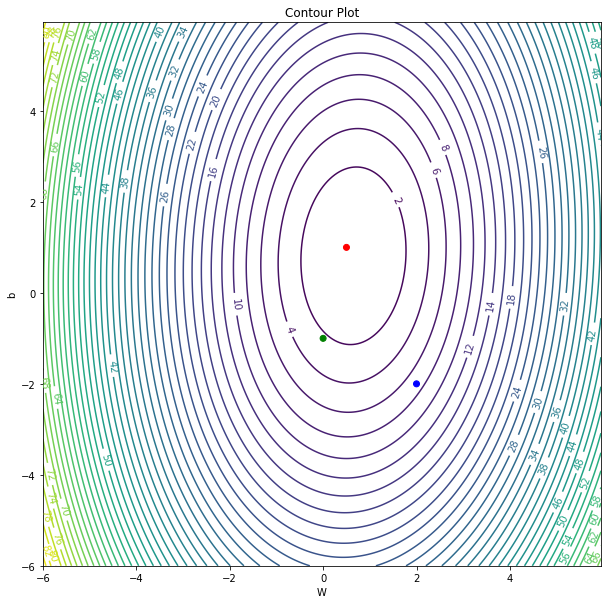

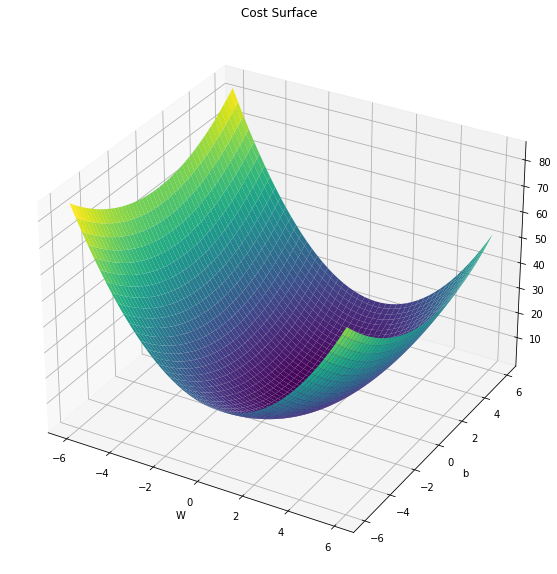

In [39]:
#collapse-hide
def cost(w,b,x,t):
    y = w*x + b 
    return np.mean(np.square(y-t))/2
# creating a weight and bias grid and then evaluating the cost function using the points on the grid
weights = np.arange(-6,6,0.05)
bias = np.arange(-6,6,0.05)
[B,W] = np.meshgrid(bias,weights)
error = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        error[i,j] = cost(W[i,j],B[i,j],x,t)
plt.figure(figsize=(10,10))
CS = plt.contour(W,B,error,50) 
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(w0,b0,c=['blue','red','green'])
plt.xlabel('W')
plt.ylabel('b')
plt.title('Contour Plot')
plt.show()

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(W, B, error,cmap='viridis', edgecolor='none')
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_title('Cost Surface')
plt.show()

In [40]:
#collapse-hide
def regression_cost1(x,w,b,t):
    y = np.matmul(x,w) + b
    return np.mean(np.square(y-t))/2

def regression_cost2(output_vec, target_vec):
    """find the cost for linear regression 

    Args:
        output_vec (1d ndarray): network outputs
        target_vec (1d ndarray): network targets

    Returns:
        float : cost 
    """
    error = (output_vec - target_vec)
    cost = (np.mean(np.square(error))) / 2
    return cost


## **Solving Optimisation**

Our goal is to choose $\left(w_{1}, w_{2}, \cdots , w_{D},b \right)$ to minimize cost  $ \mathcal{E} $ 

$$ 
\frac{\partial \mathcal{E} } {\partial w_{j}} = \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} \left( \sum_{j'} w_{j'}x_{j'}^{(i)} + b - t^{(i)}   \right) 
= \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} \left( y^{(i)} - t^{(i)} \right)
$$

$$ 
\frac{\partial \mathcal{E} } {\partial b}  = \frac{1}{N} \sum_{i=1}^{N}  \left( y^{(i)} - t^{(i)} \right)
$$



At critical point, the partial derivative of the function = 0, that is 

$$
\frac{\partial \mathcal{E} } {\partial w_{j}} = 0  , 
\frac{\partial \mathcal{E} } {\partial b} = 0  
$$
$$
\frac{\partial \mathcal{E} } {\partial w_{j}} = \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} \left( \sum_{j'} w_{j'}x_{j'}^{(i)} + b - t^{(i)}   \right) 
= 0
$$
$$
= \frac{1}{N} \sum_{j'= 1}^{D} \left( \sum_{i=1}^{N} x_{j}^{(i)} x_{j'}^{(i)} \right)w_{j'} - \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} t^{(i)} = 0
$$
A system of $D$ linear equations in $D$ coefficients, that is :

$$
\sum_{j' = 1}^{D} A_{jj'}w_{j'} - c_{j} = 0 \;\;\;\; \forall j \in \{1, \cdots, D \}
$$
where $A_{jj'} = \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} x_{j'}^{(i)}$ and $c_{j} = \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)}t^{(i)}$ 

This is a system of linear equation and there exists a **closed form** solution. In most cases, we have to encounter a system of *non-linear* equations and a closed form solution will not exist.

#### **Vector Form**

$$
\textbf{A} = \frac{1}{N} \textbf{X}^{T}\textbf{X}, \;\;\; \textbf{c} = \frac{1}{N} \textbf{X}^{T} \textbf{t}
$$

The solution to the linear equation 
$$
\textbf{A} \textbf{w} = \textbf{c} 
$$
is given by 
$$
\textbf{w} = \textbf{A}^{-1} \textbf{c} \;\; 
$$
assuming $A$ is invertible 

$$
\textbf{w} = ( \textbf{X}^{T}\textbf{X} )^{-1} \textbf{X}^{T} \textbf{t}
$$



In [42]:
#collapse-hide
def excat_solution(X, t):
    N, D = np.shape(X)
    A = np.matmul(X.T, X)
    c = np.dot(X.T, t)
    return np.matmul(np.linalg.inv(A), c)

## **Gradient Descent**

GD is an **iterative algorithm**, that is, an update rule is applied over and over again and iterates gradually improves over time if we are lucky !. In gradient descent, the weights are repeatedly adjusted in the direction which decreases the cost function , i.e in the direction of **steepest descent**, if we plot the cost function as a surface. We will repeat this until the cost function converges and if lucky, the final iterate will be close to the optimum

#### **Gradient Vector** 



$$
\nabla_{w} \mathcal{E} =  \frac{\partial \mathcal{E}}{\partial \textbf{w}} = 
\begin{pmatrix}  
\frac{\partial \mathcal{E}}{\partial w_{1}} \\ 
\vdots \\
\frac{\partial \mathcal{E}}{\partial w_{D}}
\end{pmatrix}
$$

This gives the direction of the **steepest ascent** 

#### **Gradient Update Rule** 
$$
\textbf{w} \leftarrow \textbf{w} - \alpha \frac{\partial \mathcal{E}}{\partial \textbf{w}} 
$$
where $\alpha$ is the **learning rate** which defines the step of the descent. In general take $\alpha$ a small value of 0.01 or 0.001 

In co-ordinate terms 
$$ 
w_{j} \leftarrow w_{j} - \frac{1}{N} \sum_{i=1}^{N} x_{j}^{(i)} \left( y^{(i)} - t^{(i)} \right)
$$



* The gradient descent give us fixed points or point of convergence, where iterate dosen't changes. That is the point $ \frac{\partial \mathcal{E}}{\partial \textbf{w}} = 0 $. With gradient descent , we never reaches optimum but merely approaches 


* Two advantages of gradient descent
   * Exact solution can be done only for a handful of models but gradient descent can be used for all models whose cost function is differentiable 
   * Computational cost invloves in solving a system of equation might be large compared with a single gradient descent update and gradient descent will gives a solution faster 

In [43]:
#collapse-hide
def gradfn(input_mat,output_vec,target_vec):
    """finds the gradient of the linear regression error function 

    Args:
        input_mat (num_input x dim_input ndarray): input matrix 
        output_vec (1d ndarray): network outputs 
        target_vec (1d ndarray): network targets

    Returns:
        same size as weight matrix , ndarray: partial derivative of error w.r.t weight
    """
    num_input = input_mat.shape[0] 
    error_vec = (output_vec - target_vec)
    del_w = np.matmul(error_vec, input_mat)/(num_input)
    return del_w

def gradient_descent(input_mat, target_vec, epochs, learn_rate, print_cost):
    dim_input = input_mat.shape[1]
    weight_vec = np.zeros((dim_input))
    cost = np.zeros((epochs))
    for e in range(epochs):
        output_vec = np.matmul(input_mat, weight_vec) 
        del_w = gradfn(input_mat, output_vec, target_vec) 
        weight_vec -= learn_rate*del_w 
        cost[e] = regression_cost2(output_vec,target_vec)
        if print_cost:
            if  e % (epochs/10) == 0 :
                print("Cost is {} @ Epocs {}".format(cost[e], e))
    return weight_vec, cost                

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

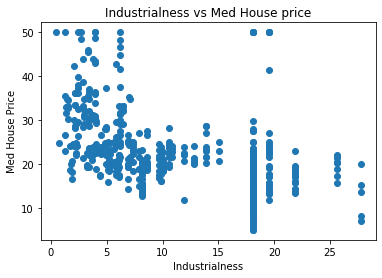

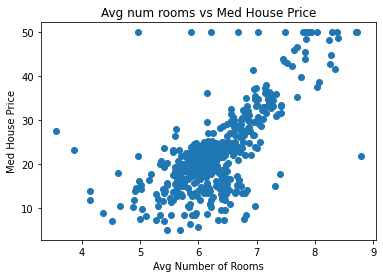

In [44]:
#collapse-hide
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR'])
data = boston_data['data']
#taking only two features
x_input = data[:,[2,5]]
y_target = boston_data['target']
plt.title('Industrialness vs Med House price')
plt.scatter(x_input[:,0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg num rooms vs Med House Price')
plt.scatter(x_input[:,1], y_target)
plt.xlabel('Avg Number of Rooms')
plt.ylabel('Med House Price')
plt.show()

In [45]:
#collapse-hide
epochs = 100000
learn_rate = 0.005
# bias is treated as the input of ones
num_input = x_input.shape[0] 
input_with_bias = np.concatenate([x_input,np.ones((num_input,1))], axis = 1 )
weights, cost = gradient_descent(input_mat=input_with_bias, target_vec=y_target,epochs = epochs,learn_rate=learn_rate,print_cost=True )



Cost is 296.0734584980237 @ Epocs 0
Cost is 20.603285188276697 @ Epocs 10000
Cost is 20.003361177337872 @ Epocs 20000
Cost is 19.752678891831366 @ Epocs 30000
Cost is 19.647929611721008 @ Epocs 40000
Cost is 19.604159420056007 @ Epocs 50000
Cost is 19.585869750891966 @ Epocs 60000
Cost is 19.57822728954086 @ Epocs 70000
Cost is 19.575033835630936 @ Epocs 80000
Cost is 19.573699429422472 @ Epocs 90000


In [47]:
#collapse-hide
print("weights with gradient descent:{}".format(weights))
print("weights with excat solution:{}".format(excat_solution(input_with_bias,y_target)))

weights with gradient descent:[ -0.33706425   7.77893565 -22.59853432]
weights with excat solution:[ -0.33471389   7.82205511 -22.89831573]


## **Polynomial Regression**

If the relationship between inputs and targets are non-linear, we use polynomial regression 

Assume an input-out relationship which is cubic :

$$
y = w_{3}x^{3} + w_{2}x^{2} + w_{1}x + w_{0} 
$$

Algorithamically, we can treat this is similar to linear regression , that is equation is linear in parameter while non-linear in inputs. For inputs we can apply **feature mapping** . We create a input matrix which is 

$$
\phi(x) = \begin{pmatrix} 
x^{3} \\
x^{2} \\
x \\
1  
\end{pmatrix} ,
\;\;
\textbf{w} = \begin{pmatrix}
w_{3} \\
w_{2} \\
w_{1} \\
w_{0} 
\end{pmatrix} ,

\;
\;
y = \textbf{w}^{T} \phi(x)
$$

The feature maps are good but it has it's own drawbacks 
1. The features must be known in advance. Feature engineering is an expert domain and take up a lot of time 
2. In high dimension, the features become very large and complex 

In [10]:
#collapse-hide
# polynomial feature mapping
def polynomial_features(n,input_data):
    features = []
    for k in input_data:
        features.append([k**i for i in range(n+1)])
    return np.array(features)

# excat solution


# polynomial regression using excat solution
def polynomial_regression(train_data, train_targets,degree):
    features = polynomial_features(degree, train_data)
    coeffs = excat_solution(features, train_targets)
    fit_values = np.dot(features,coeffs)
    return coeffs, fit_values

## **Generalization**

* A good training algorith will generalize to examples it has'nt seen before
* **Generalization Error** : average squared error on novel examples and we would like this to be as small as possible

Consider a dataset sampled from a noisy sinusoidal wave pattern and 3 different polynomial models 
1. Linear : 1-degree
2. Cubic : 3-degree
3. 10-degree 

The linear function may be too simplistic to describe the data and this results in **underfitting** 

The degree-10 polynomial may be able to fit the data excatly at every points and thus learns a function which will be very sensitive to noise and makes silly prediction everywhere except training data and this is known as **overfitting**

The cubic polynomial is a reasonable compromise and this can be seen in the test error 

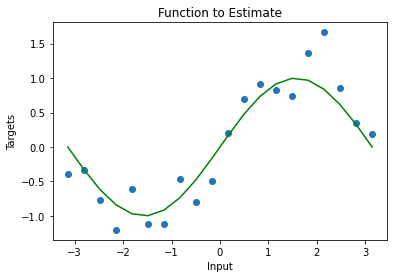

In [14]:
#collapse-hide
# OVERFTTING vs ACCURATE vs UNDERFITTING
#creating the dataset
np.random.seed(50)
data_x= np.linspace(-np.pi, np.pi,20) 
data_y = np.sin(data_x)
noise =  np.random.normal(0,0.25,data_x.shape[0])
input_data = data_x 
target_data = data_y + noise
plt.scatter(input_data,target_data)
plt.title('Function to Estimate')
plt.xlabel('Input')
plt.ylabel('Targets')
plt.plot(input_data, data_y,'g')
plt.show()

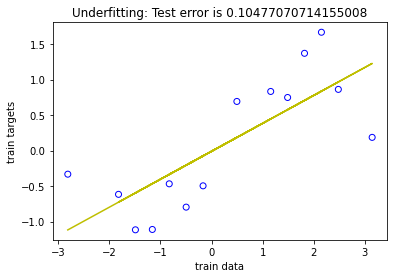

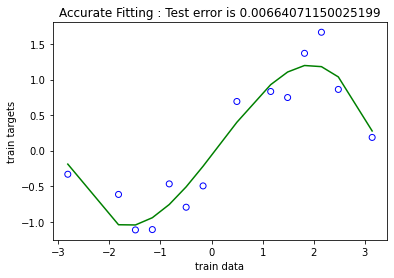

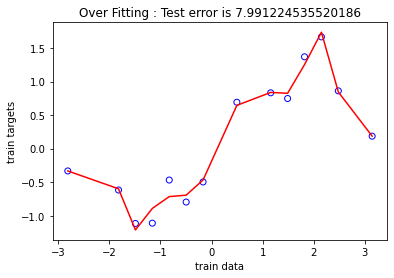

In [15]:
#collapse-hide
# splitting the train and test 
data_index = np.arange(0,input_data.shape[0]) 
train_index = np.random.choice(data_index, size=int(len(data_index)*0.7), replace=False) 
test_index = list(filter(lambda x: x not in train_index, data_index))
train_input, test_input = input_data[train_index], input_data[test_index]
train_targets, test_target = target_data[train_index], target_data[test_index]


# finding coefficients using excat solutions. interested people can try out the gradient descent.
# the values will nearly the same
poly1_coeffs,poly1_fit = polynomial_regression(train_input, train_targets, 1)
poly3_coeffs,poly3_fit = polynomial_regression(train_input, train_targets, 3)
poly9_coeffs,poly9_fit = polynomial_regression(train_input, train_targets, 9)


#sorting the train index for plotting
sort_index = train_index.argsort()


# # # plotting for degree = 1 
plt.figure()
poly1_axes = plt.axes()
poly1_axes.scatter(train_input,train_targets,facecolors='none', edgecolors='b')
poly1_axes.set_xlabel('train data')
poly1_axes.set_ylabel('train targets')
poly1_axes.plot(train_input,poly1_fit,'y')
# calculating error 
poly1_coeffs_test,poly1_fit_test = polynomial_regression(test_input, test_target, 1)
poly1_error = np.mean(np.square(poly1_fit_test - test_target))/2
poly1_axes.set_title('Underfitting: Test error is {}'.format(poly1_error))
plt.show()

# # # plotting for degree = 3 
plt.figure()
poly3_axes = plt.axes()
poly3_axes.scatter(train_input,train_targets,facecolors='none', edgecolors='b')
poly3_axes.set_xlabel('train data')
poly3_axes.set_ylabel('train targets')
poly3_axes.plot(train_input[sort_index],poly3_fit[sort_index],'g')
# calculating error 
poly3_coeffs_test,poly3_fit_test = polynomial_regression(test_input, test_target, 3)
poly3_error = np.mean(np.square(poly3_fit_test - test_target))/2
poly3_axes.set_title('Accurate Fitting : Test error is {}'.format(poly3_error))
plt.show()

# # # plotting for degree = 9
plt.figure()
poly9_axes = plt.axes()
poly9_axes.scatter(train_input,train_targets,facecolors='none', edgecolors='b')
poly9_axes.set_xlabel('train data')
poly9_axes.set_ylabel('train targets')
poly9_axes.plot(train_input[sort_index],poly9_fit[sort_index],'r')
# calculating error 
poly9_coeffs_test,poly9_fit_test = polynomial_regression(test_input, test_target, 9)
poly9_error = np.mean(np.square(poly9_fit_test - test_target))/2
poly9_axes.set_title('Over Fitting : Test error is {}'.format(poly9_error))
plt.show()


* The degree of the polynomial is an example of *hyperparameter*, something we cant include in the training procedure but needs to set using other means. In practice we usually tune hyperparameters by partitioning dataset in to three different subsets :
   1. The **training** set is used to train the model.
   2. The **validation** set is used to estimate the generalization error of each hyperparameter setting.
   3. The **test** set is used at the very end, to estimate the generalization error of the final model, once all hyperparameters have been chosen.